# Student performance Indicator















*Life cycle of machine learning Project*
1. Understand the problem statement
2. Data collection
3. data Checks to perform
4. Exploratory data Analysis
5. Data Pre-processing
6. Model Training
7. Choose best model



###  1) Problem Statement

This project understand how the students performance(test scores) is affected by other variables such as Gender, Ethnicity,parental level of education , Lunch and Test Preparation course


### 2) Data Collection

datasource,
data consists of 8 columns and 1000 rows


### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib Seaborn and Warnings Library

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



Import CSV Data as pandas DataFrame

In [83]:
df=pd.read_csv(r'C:\Users\AARTI\udemy_python\MLPROJECTS\notebook\data\stud.csv')


Show Top 5 Head

In [84]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [85]:
df.shape

(1000, 8)

### 2.2 Dataset Information

### 3.data Checks to perform


check missing values
check duplicates
check datatype
check the number of unique values of each column
check statistics of dataset
check various categories present in the different categorical column


#### 3.1 Check Missing values

In [86]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 check Duplicates

In [87]:
df.duplicated().sum()

0

There are no duplicates in the datset

#### 3.3 Check datatypes

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check unique values in all the columns

In [89]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data

In [90]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight


1. From above description of numerical data, all means are very close to each other between 66 and 68.5;
2. All standard deviations are also close between 14.6 and 15.19;
3. while there is a minimum score 0 for math, for writing is much higher=10 and for reaching math higher =17

3.4 Check unique values in all the columns

In [91]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.7 Exploring Data

In [92]:
print ("categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("categories in 'race_ethenicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())
      

categories in 'gender' variable:  ['female' 'male']
categories in 'race_ethenicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [93]:
#define numerical and categorical columns
numeric_features =[feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features=[column for column in df.columns if df[column].dtype=='object']

#print columns
print("we have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("we have {} categorical features: {}".format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 adding column for 'Total Score' and 'Average Score'

In [94]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [95]:
#number of students with full marks in math reading and writing
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()

print(f'Number of students with full marks in math:{math_full}')
print(f'Number of students with full marks in reading:{reading_full}')
print(f'Number of students with full marks in writing:{writing_full}')

Number of students with full marks in math:7
Number of students with full marks in reading:17
Number of students with full marks in writing:14


In [96]:
#number of students with less marks in math reading and writing
reading_less=df[df['reading_score']<=20]['Average'].count()
writing_less=df[df['writing_score']<=20]['Average'].count()
math_less=df[df['math_score']<=20]['Average'].count()

print(f'Number of students with less marks in math:{math_less}')
print(f'Number of students with less marks in reading:{reading_less}')
print(f'Number of students with less  marks in writing:{writing_less}')

Number of students with less marks in math:4
Number of students with less marks in reading:1
Number of students with less  marks in writing:3


Insights

1. students have performed wirst in math
2. students have performed well in reading

### 4.Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion



a. Histogram

b. kernel Distribution Function(KDF)

 4.1.1 Histogram and KDE w.r.t. Average

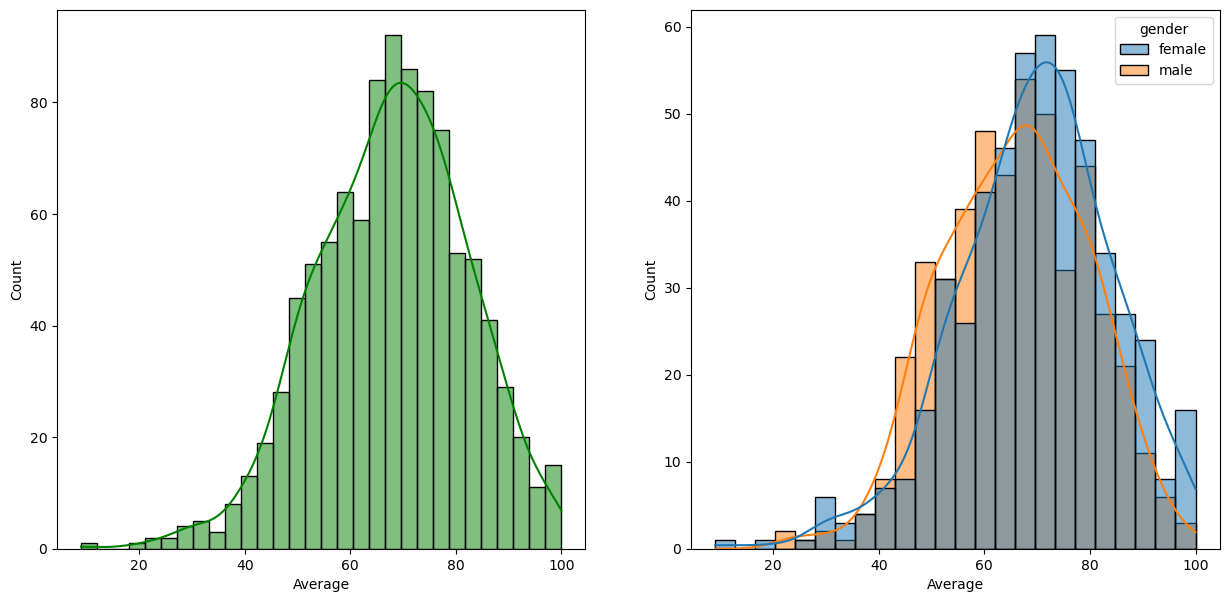

In [97]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde= True, hue='gender')
plt.show()

Insights

Female students tend to bferform well then male students


 4.1.2 Histogram and KDE w.r.t. Total score

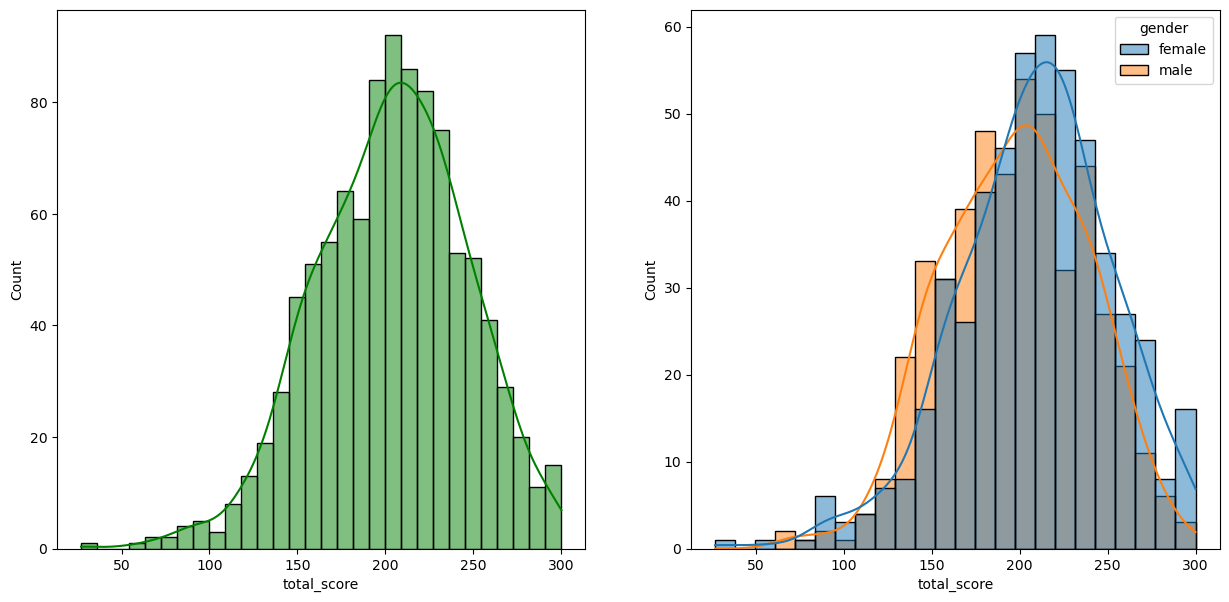

In [98]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score', kde=True, hue='gender')
plt.show()

##### Insights

Female students tend to bferform well then male students


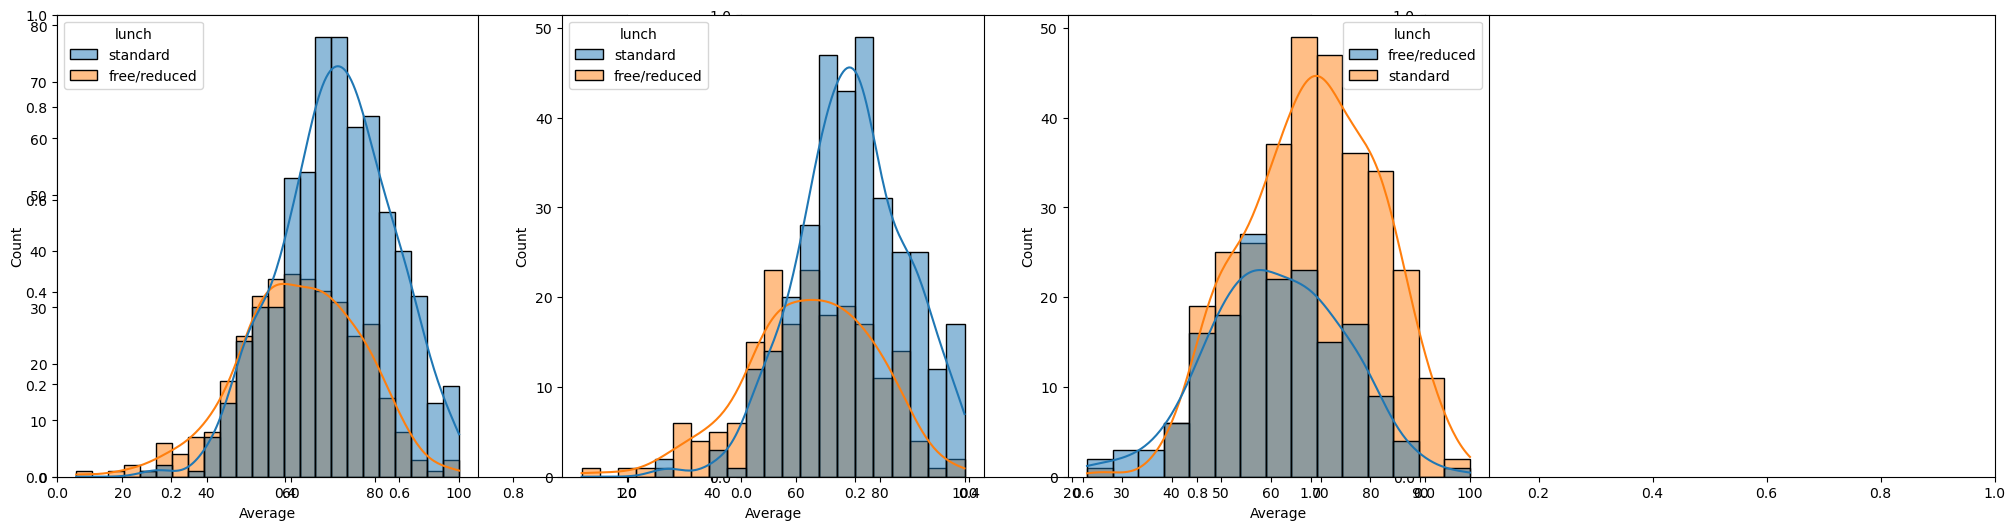

In [99]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average',kde=True,hue='lunch')
plt.show()


Insights:

1. standard lunch helps perform weel in exams

   2. standard lunch helps perform well in exams be it male or female

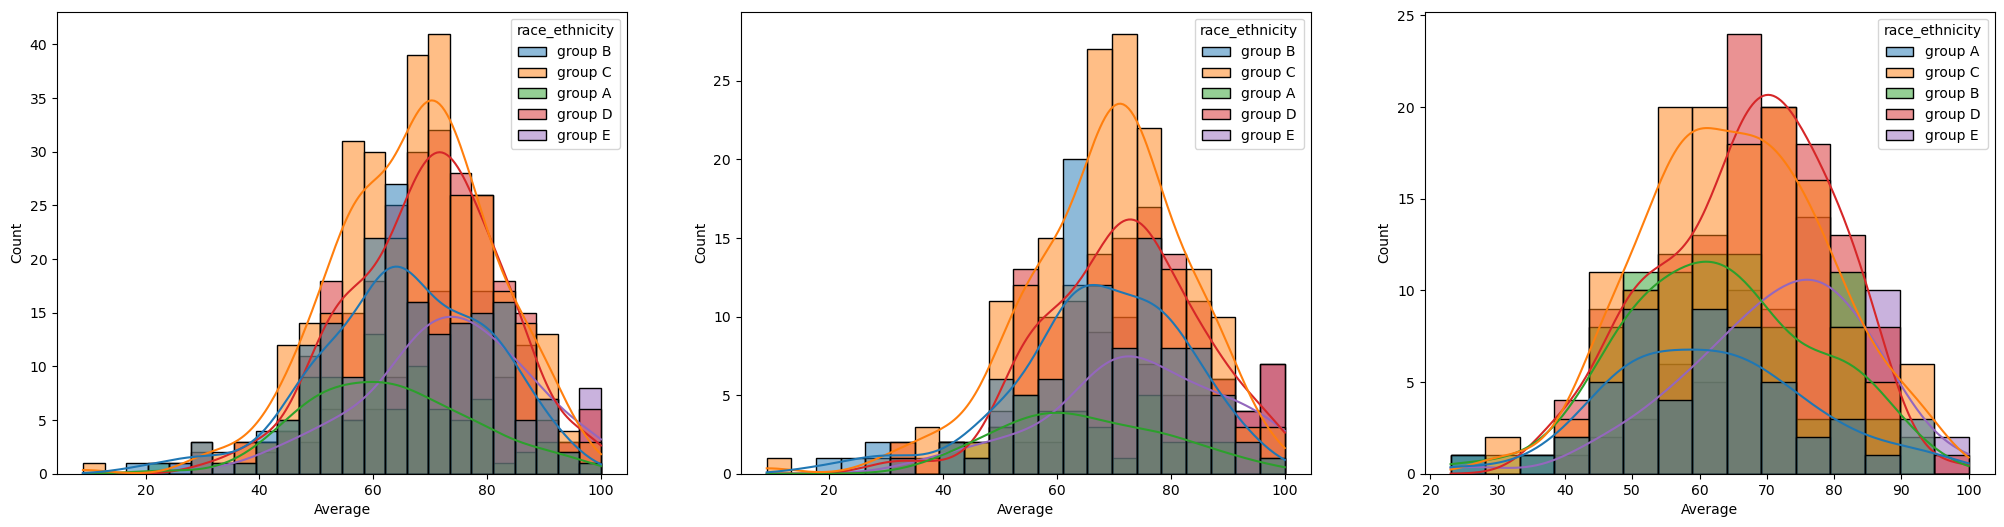

In [100]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average',kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average',kde=True,hue='race_ethnicity')
plt.show()

Insights:

1. Students of griup A and group E tends to perform pooorly in exam


2. Students of group A and Group E tend to perform poorly in exam whether it is female or male

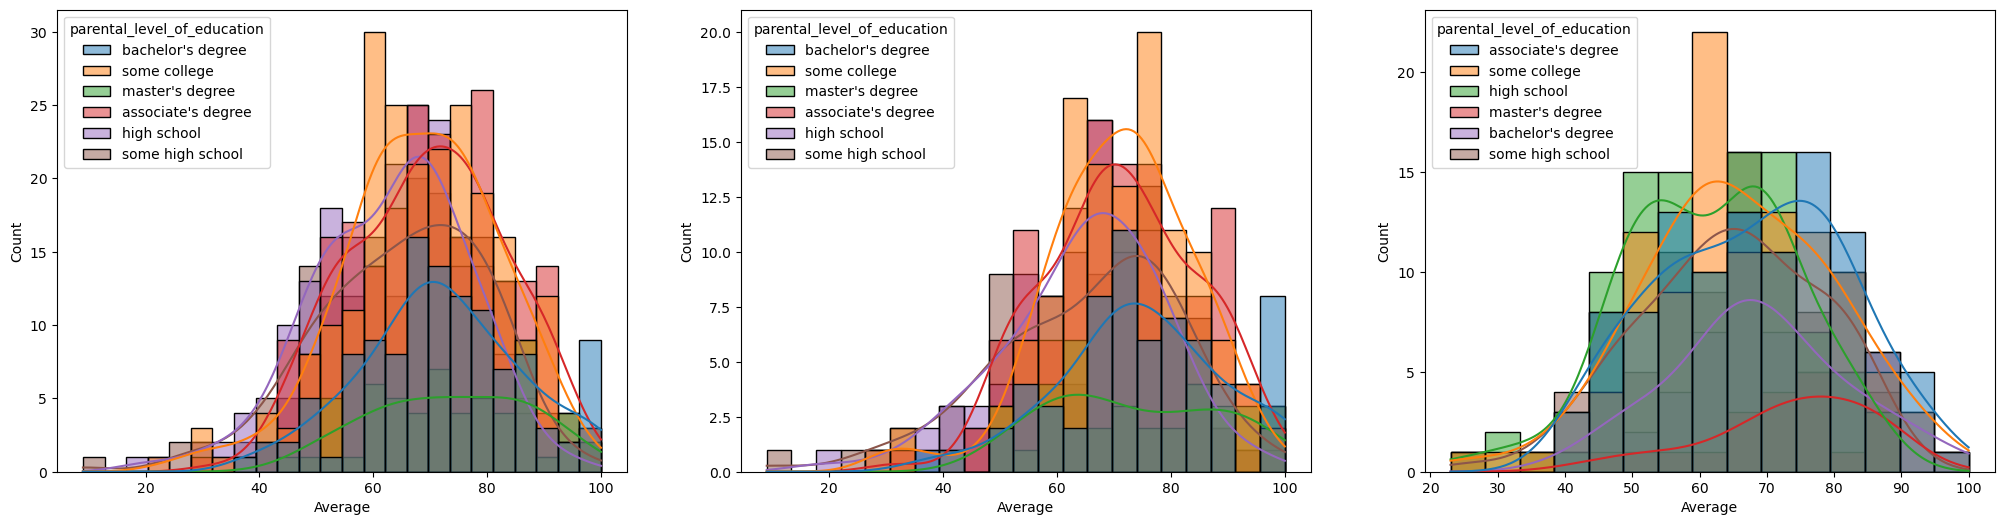

In [101]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average',kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average',kde=True,hue='parental_level_of_education')
plt.show()

insights:

1. parents education dont help student perform well in study

2. 2nd plot shows we can see there is no effect of parents education on female students exam

3. third plot shows parents whose edcution is masters and assosiate their male child does well in exam

### 4.2 maximum score of students in all three subjects

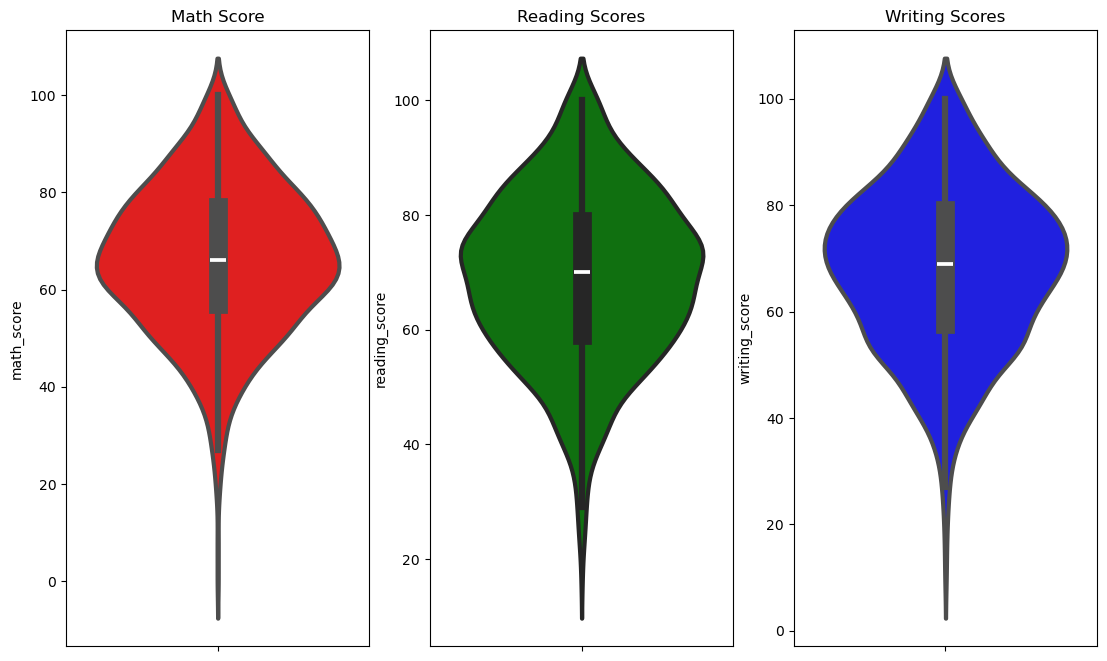

In [102]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y="reading_score", data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(y="writing_score", data=df, color='blue', linewidth=3)
plt.show()

Insights:

From above three graphs it is clear that maximum students score between 60-80 in reading and writing whereas in math they score between 50-80

### 4.3 Multivariate analysis using pie plot

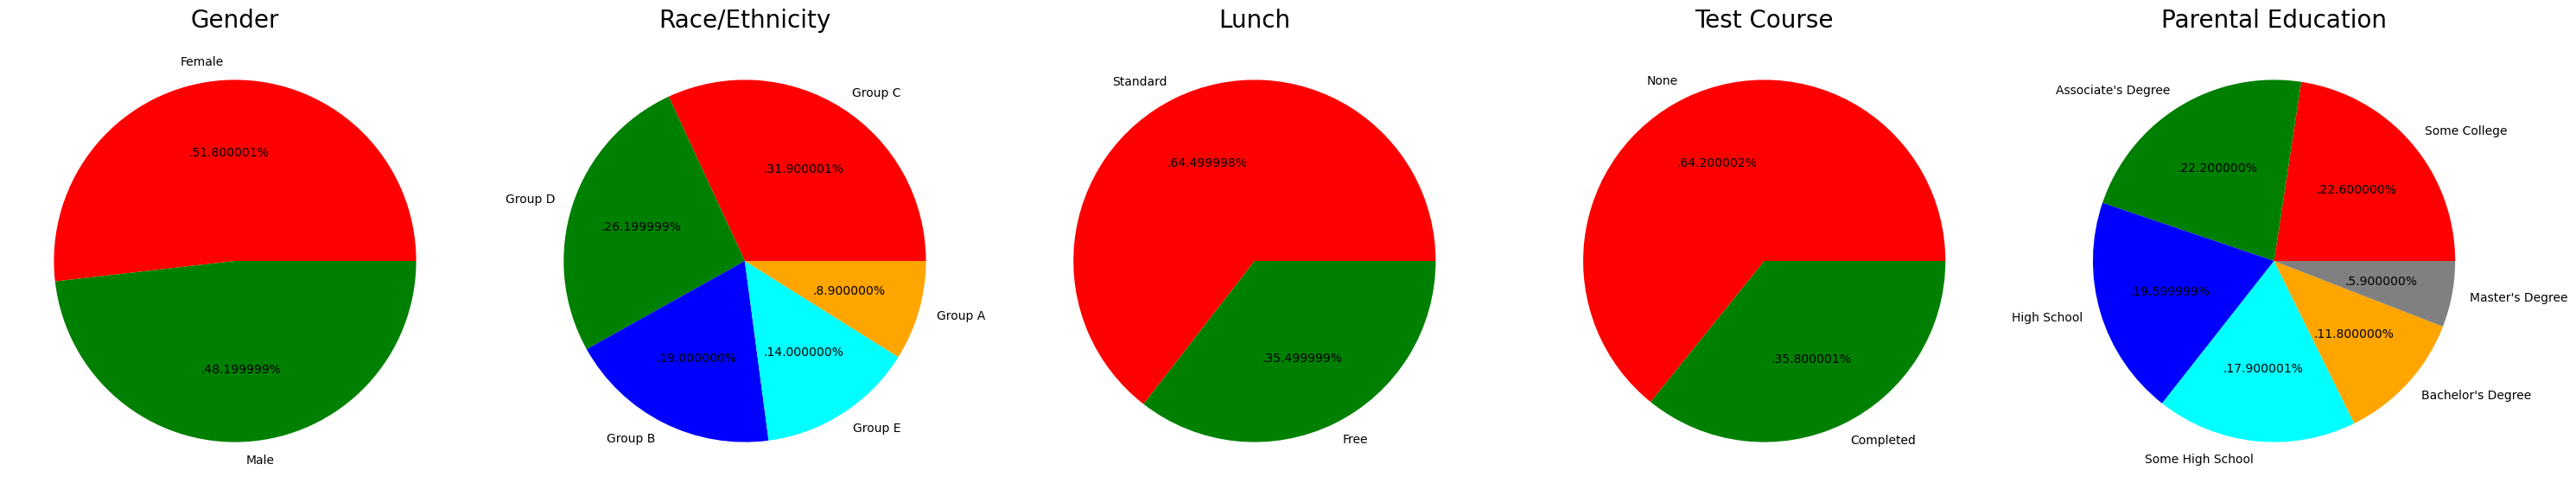

In [103]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

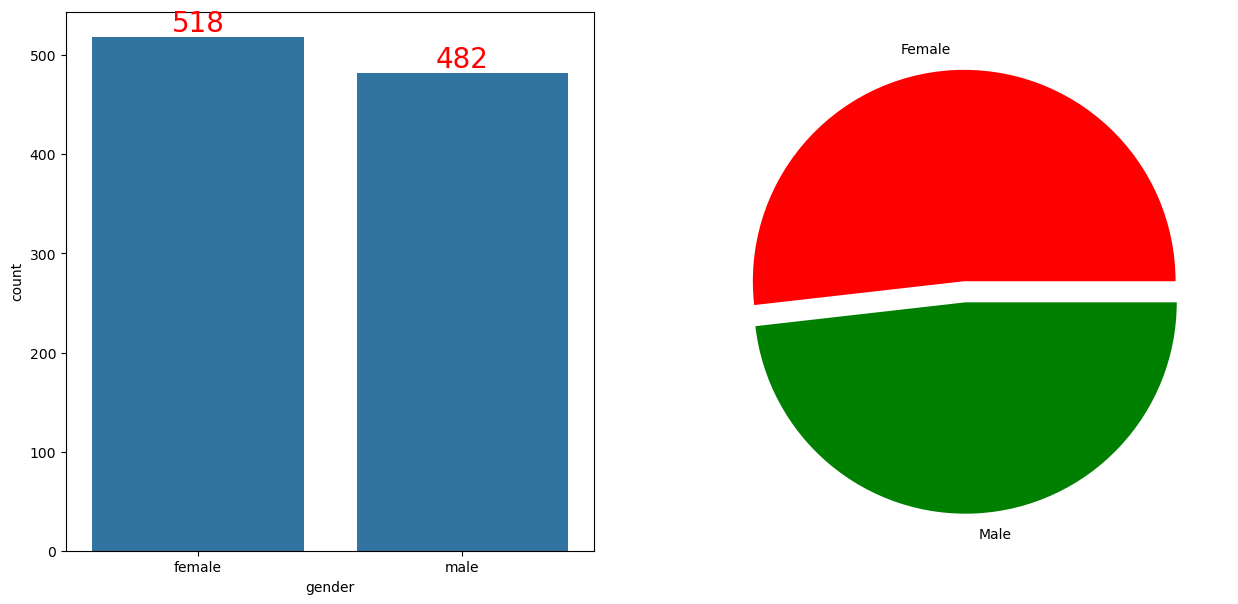

In [104]:
f, ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=df['gender'], data=df, ax=ax[0],saturation=0.75)
for container in ax[0].containers:
    ax[0].bar_label(container,color='red', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Female', 'Male'], colors=['red','green'], explode=(0,0.1))
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [119]:
print(df.columns)
print(df.head())
print(df.dtypes)
print(df['gender'].unique())

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'Average'],
      dtype='object')
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4          

In [123]:
# Ensure the column names are stripped of any leading/trailing spaces
df.columns = df.columns.str.strip()

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by 'gender' and calculate the mean only for numeric columns
gender_group = df[numeric_columns].groupby(df['gender']).mean()

# Display the grouped results
print(gender_group)









        math_score  reading_score  writing_score  total_score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


C:\Users\AARTI\AppData\Local\Temp\ipykernel_13916\966029331.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_group = df[numeric_columns].groupby(df['gender']).mean()


C:\Users\AARTI\AppData\Local\Temp\ipykernel_13916\3862519082.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores=[gender_group['Average'][0], gender_group['math_score'][0]]
C:\Users\AARTI\AppData\Local\Temp\ipykernel_13916\3862519082.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores=[gender_group['Average'][1], gender_group['math_score'][1]]


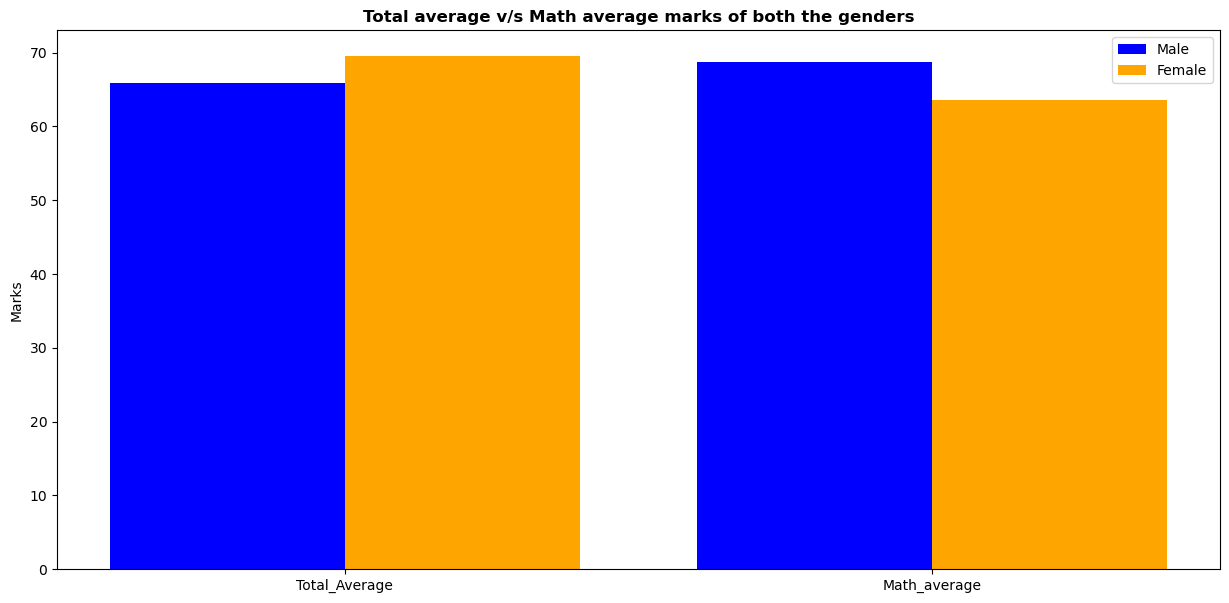

In [126]:
plt.figure(figsize=(15,7))

X=['Total_Average', 'Math_average']

female_scores=[gender_group['Average'][0], gender_group['math_score'][0]]
male_scores=[gender_group['Average'][1], gender_group['math_score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male',color='blue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female', color= 'orange')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

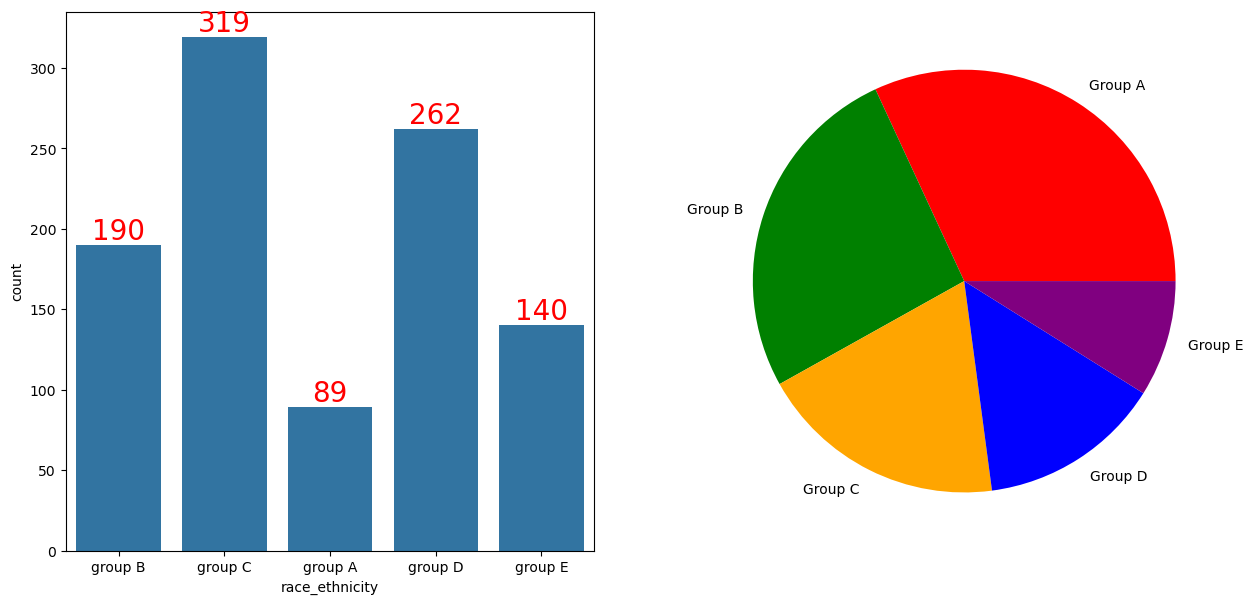

In [127]:
f, ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=df['race_ethnicity'], data=df, ax=ax[0],saturation=0.75)
for container in ax[0].containers:
    ax[0].bar_label(container,color='red', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'], colors=['red','green', 'orange','blue','purple'])
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

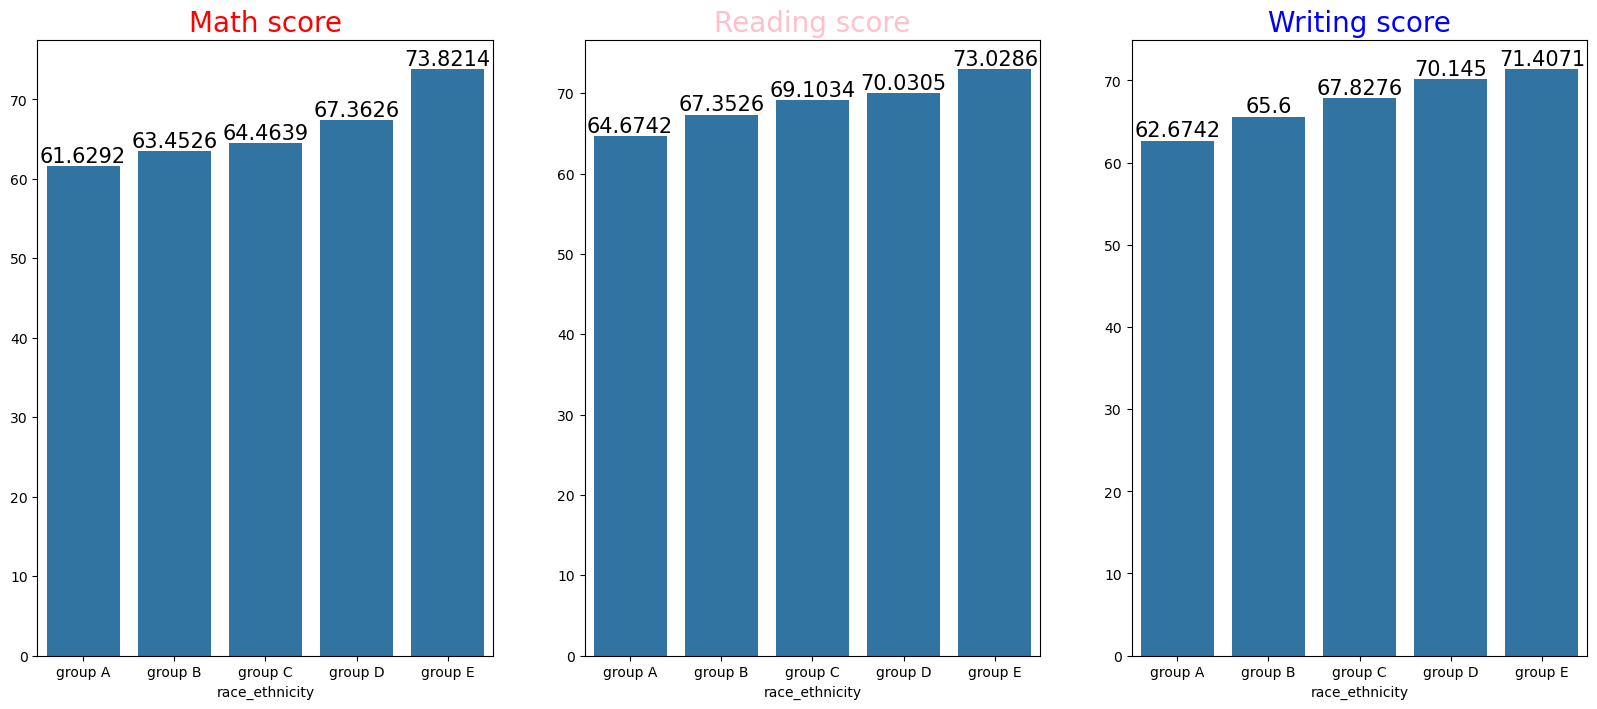

In [129]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values,ax=ax[0])
ax[0].set_title('Math score',color='red',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)



sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,ax=ax[1])
ax[1].set_title('Reading score',color='pink',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)



sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,ax=ax[2])
ax[2].set_title('Writing score',color='blue',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

C:\Users\AARTI\AppData\Local\Temp\ipykernel_13916\4115091206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'Blues')


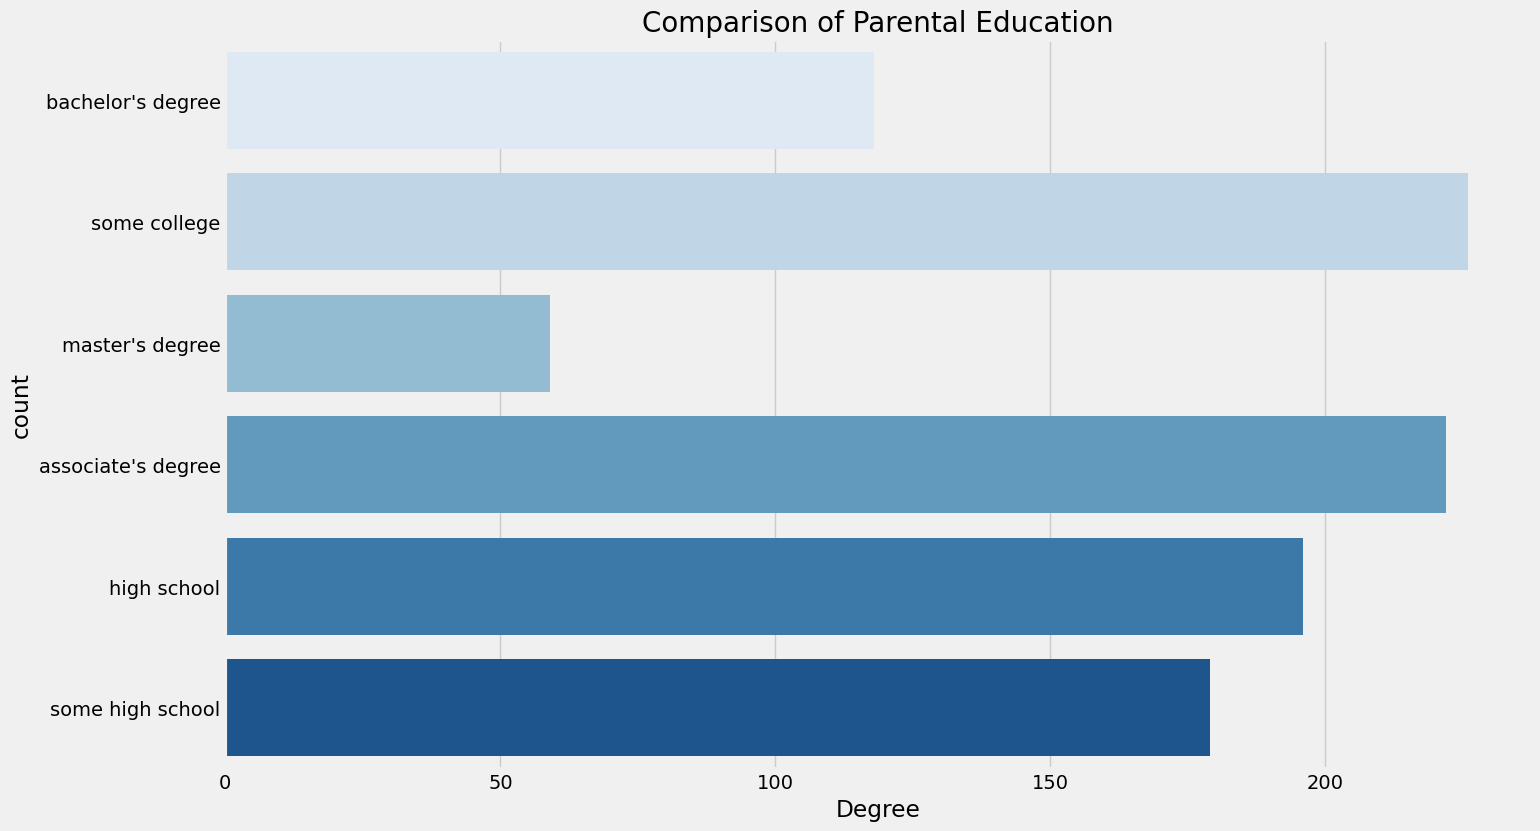

In [130]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

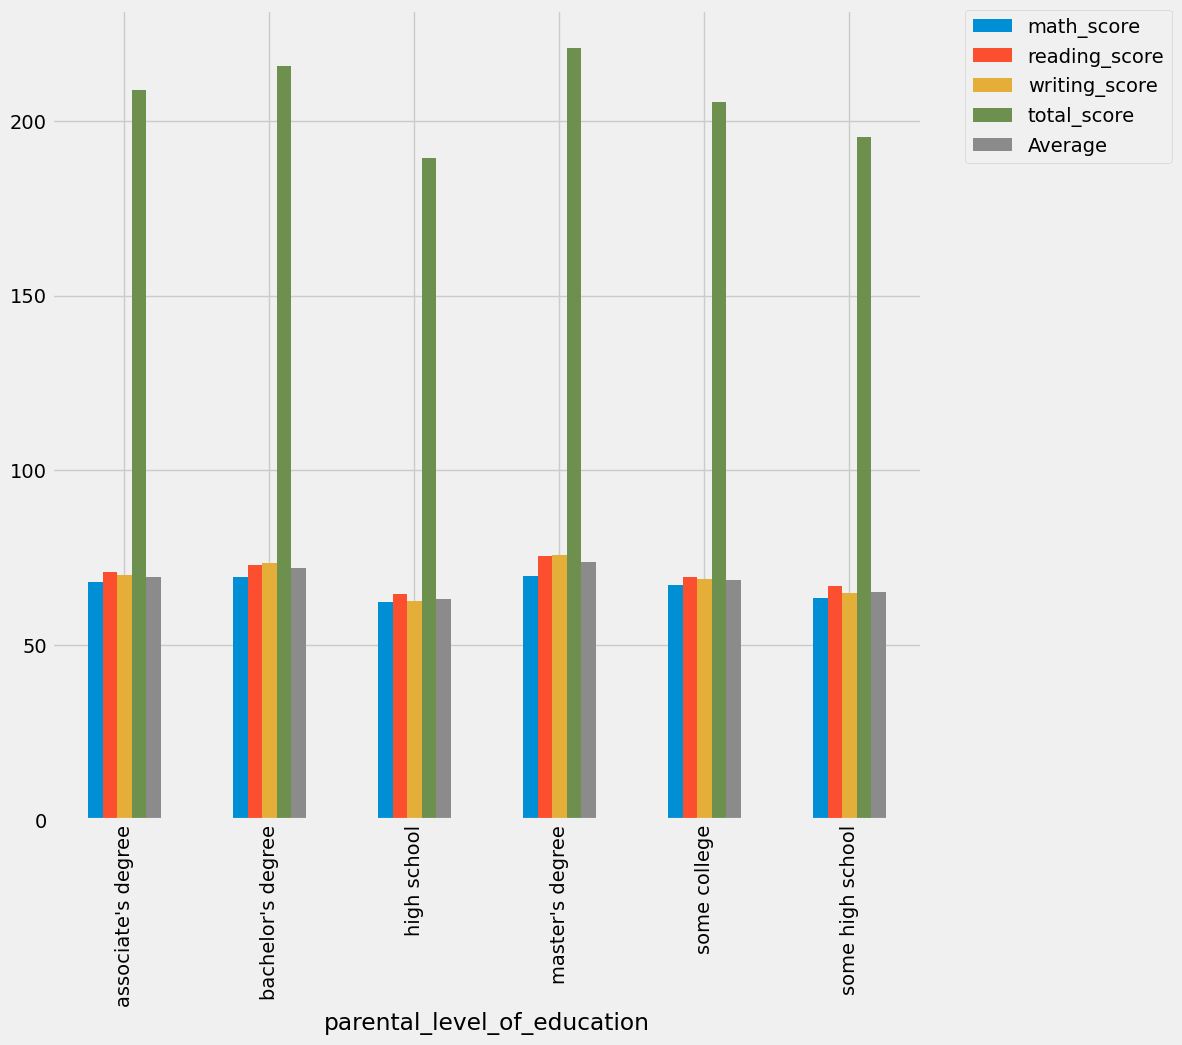

In [131]:
df.groupby('parental_level_of_education').agg({'math_score': 'mean', 'reading_score': 'mean', 'writing_score': 'mean', 'total_score': 'mean', 'Average': 'mean'}).plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess masterdegree and bachelor degree level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

C:\Users\AARTI\AppData\Local\Temp\ipykernel_13916\3265900429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


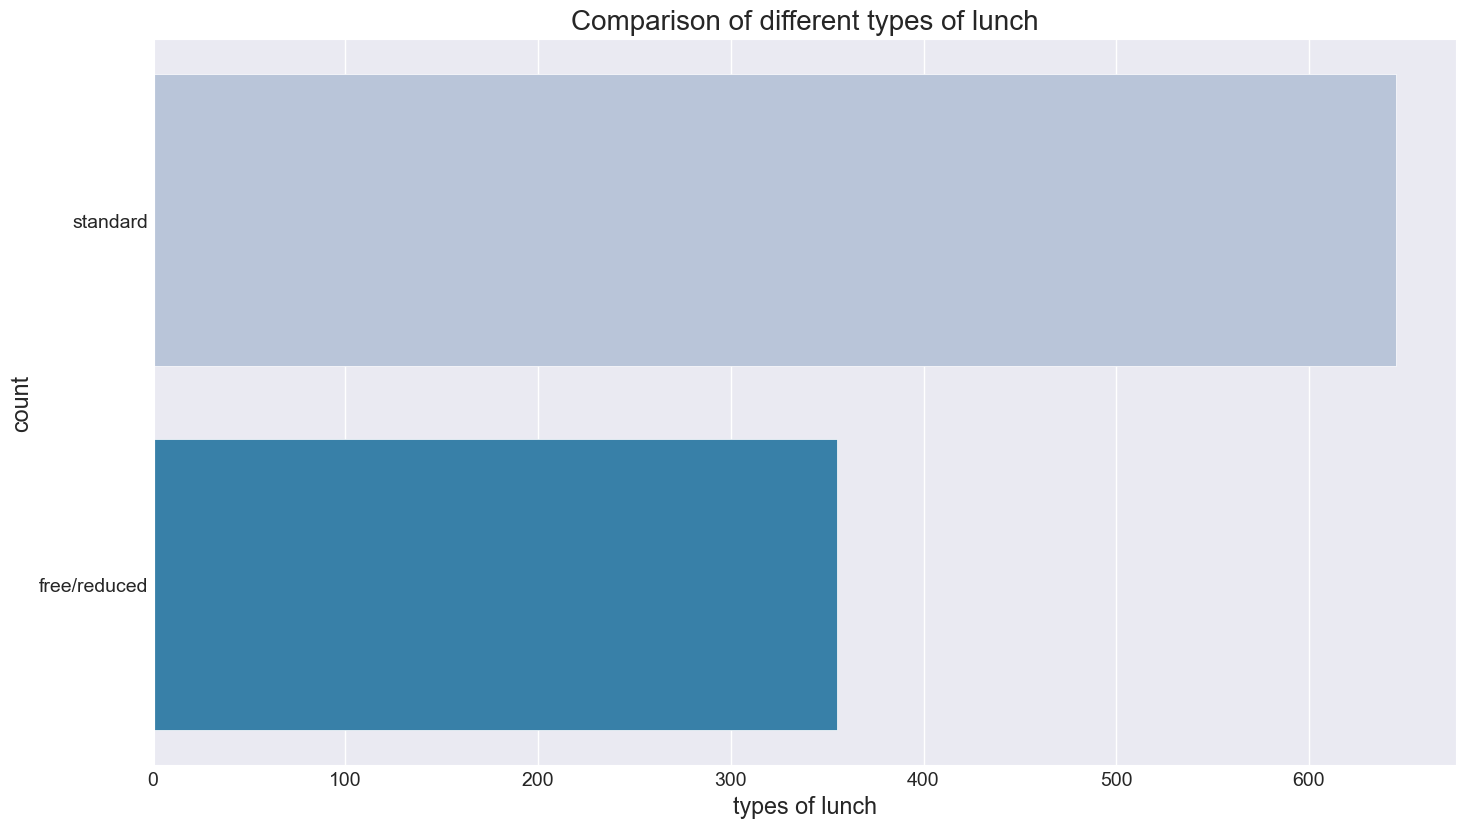

In [132]:
plt.rcParams['figure.figsize'] = (15, 9)
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

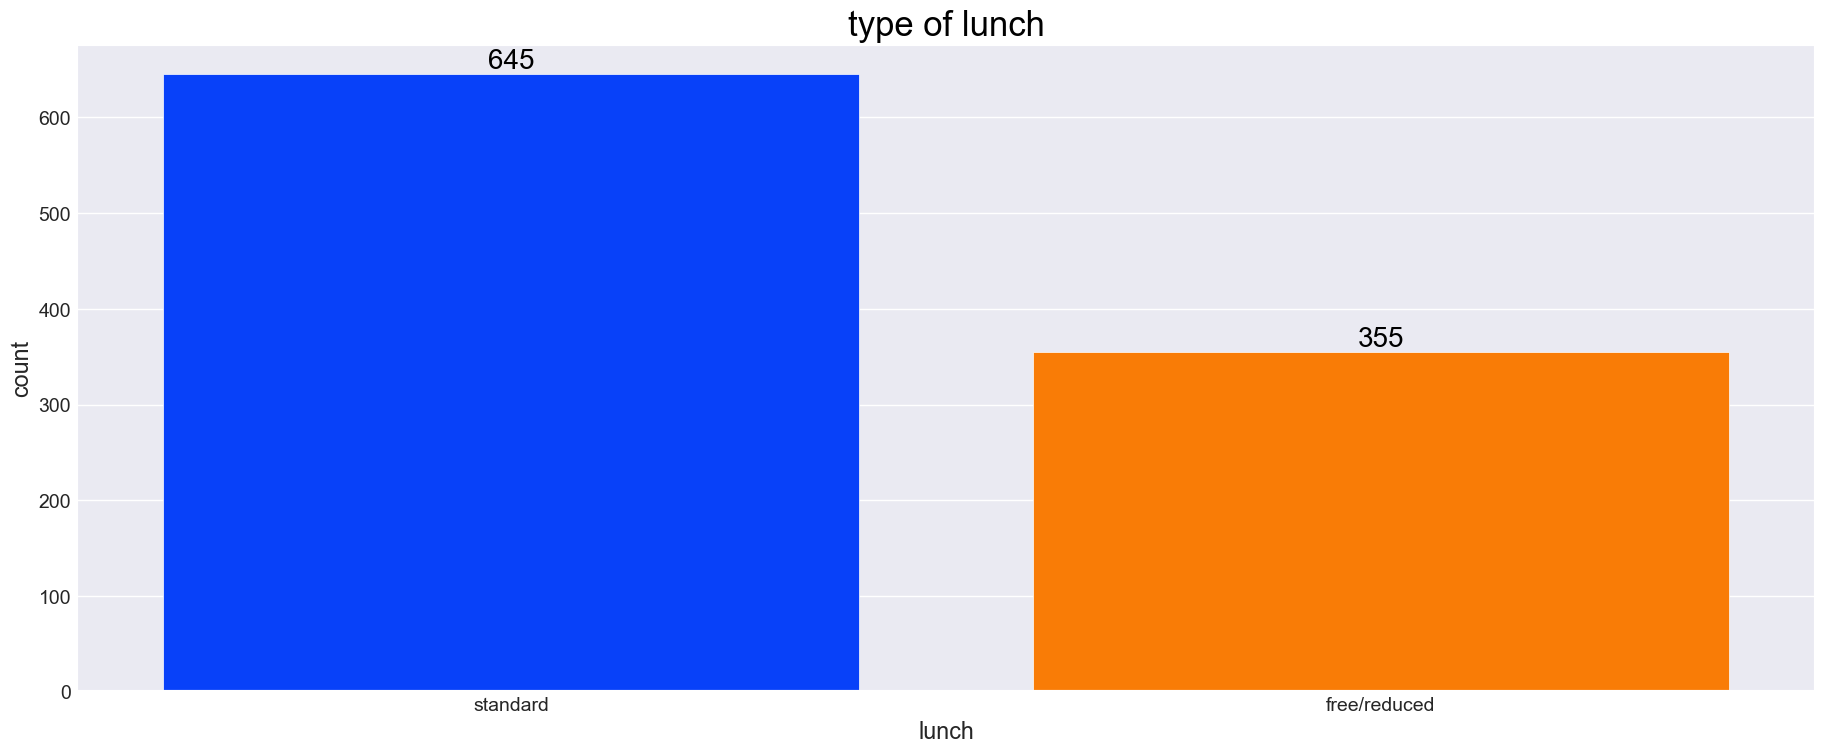

In [133]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax)
ax.set_title('type of lunch',color='black',size=25)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Is Test prepration course has any impact on student's performance ?
- Is lunch having an impact on students performance

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

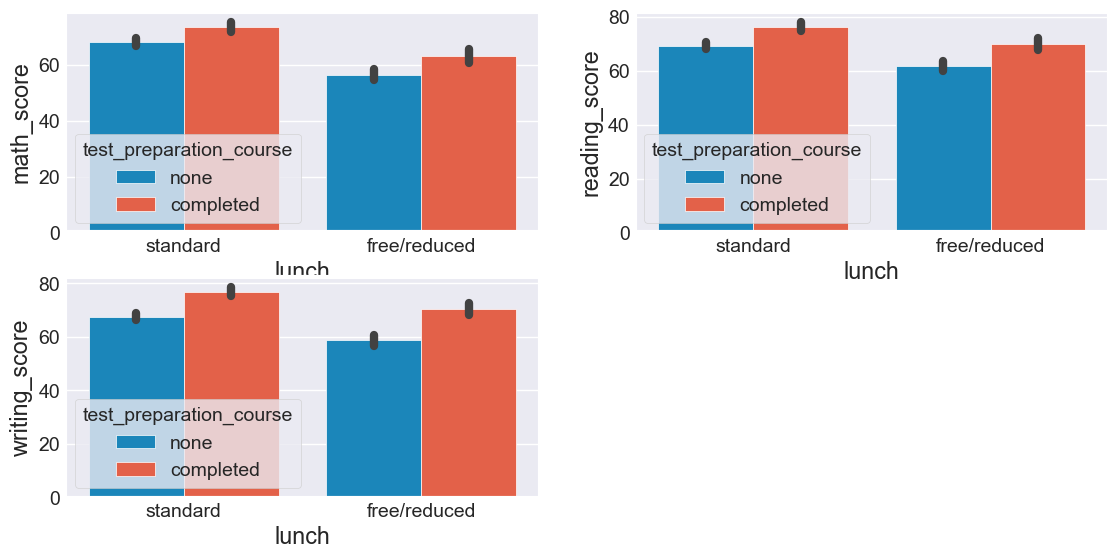

In [136]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])

plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])

plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

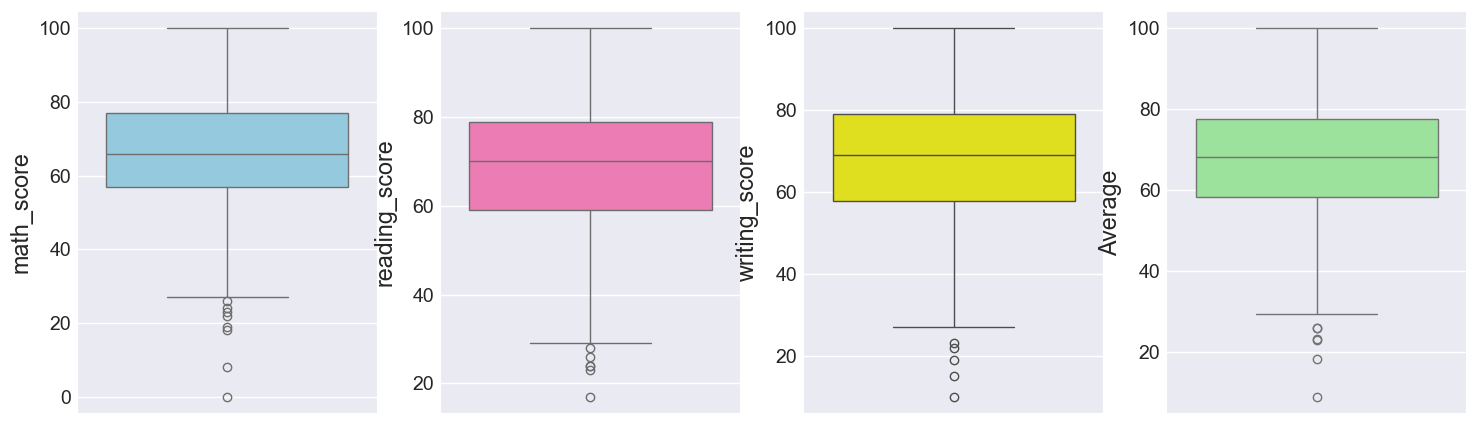

In [137]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')

plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')

plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

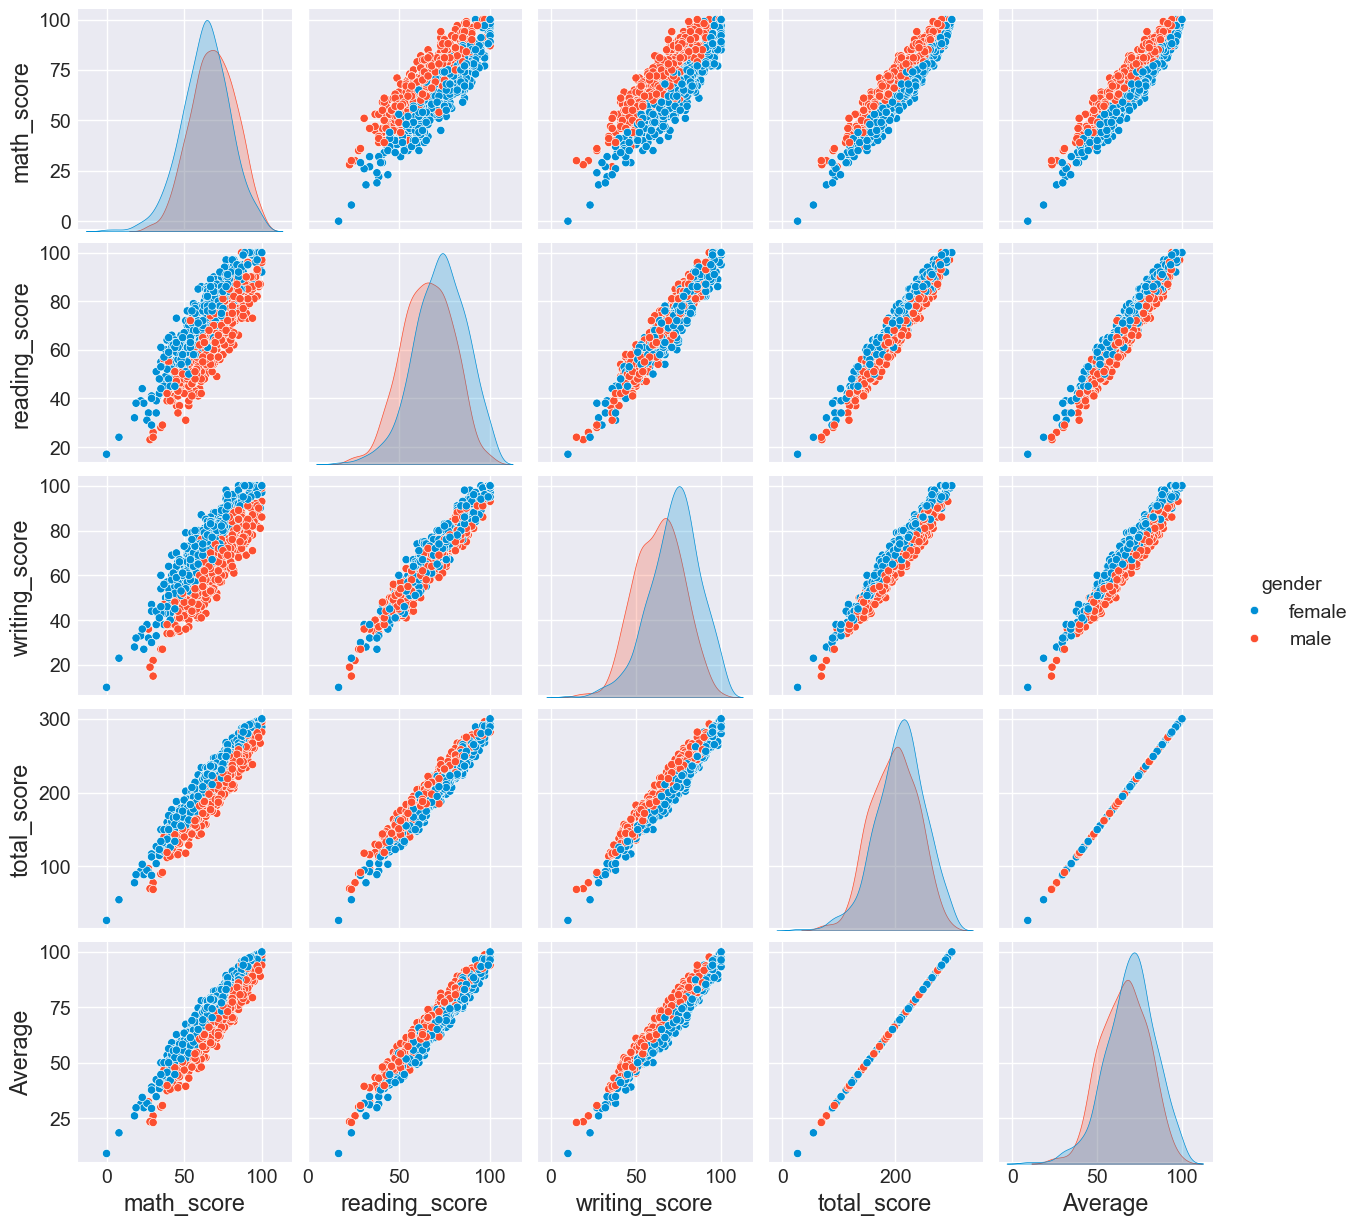

In [138]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.